In [49]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (25, 8)

# Thoughts

This is binary classification, so we can do things like
* KNN
* Logistic regression
* Neural networks I guess???
* SVM
* Decision trees/random forests

Maybe I'll try tackling this using all these techniques who knows

# EDA

Data dictionary at: https://www.kaggle.com/c/titanic/data

In [35]:
titanic = pd.read_csv("train.csv", index_col = 0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I'll remap genders to numeric (M->1, F->0) because strings are useless.

In [36]:
titanic = titanic.assign(Sex = titanic.Sex.map({"female":0, "male":1}))
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [46]:
#fractional age examples
titanic[titanic.Age < 1].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
79,1,2,"Caldwell, Master. Alden Gates",1,0.83,0,2,248738,29.0000,NaN,S
306,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S
470,1,3,"Baclini, Miss. Helene Barbara",0,0.75,2,1,2666,19.2583,NaN,C
645,1,3,"Baclini, Miss. Eugenie",0,0.75,2,1,2666,19.2583,NaN,C
756,1,2,"Hamalainen, Master. Viljo",1,0.67,1,1,250649,14.5000,NaN,S


In [45]:
#xx.5 examples
titanic[(titanic.Age - np.fix(titanic.Age)) == 0.5].head()

C:\Users\ckaiw.LAPTOP-THCC7RLJ\Anaconda3\lib\site-packages\numpy\lib\ufunclike.py:105: RuntimeWarning: invalid value encountered in greater_equal
  res = nx.floor(x, out=res, where=nx.greater_equal(x, 0))


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
58,0,3,"Novel, Mr. Mansouer",1,28.5,0,0,2697,7.2292,NaN,C
112,0,3,"Zabour, Miss. Hileni",0,14.5,1,0,2665,14.4542,NaN,C
117,0,3,"Connors, Mr. Patrick",1,70.5,0,0,370369,7.7500,NaN,Q
123,0,2,"Nasser, Mr. Nicholas",1,32.5,1,0,237736,30.0708,NaN,C
124,1,2,"Webber, Miss. Susan",0,32.5,0,0,27267,13.0000,E101,S


## Does fare matter?

C:\Users\ckaiw.LAPTOP-THCC7RLJ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


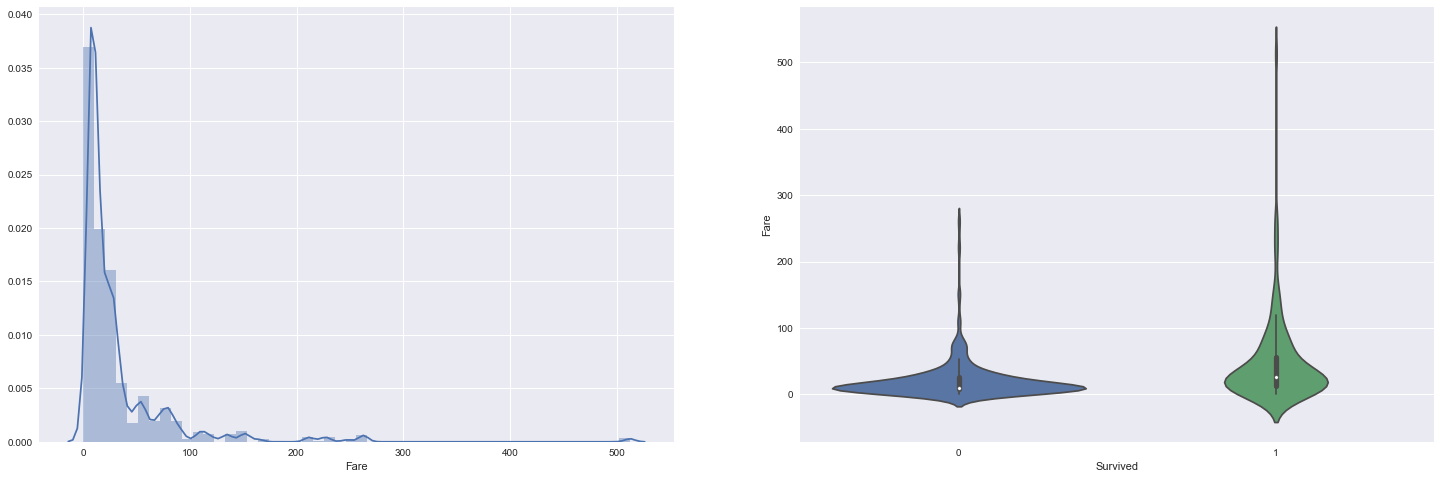

In [61]:
plt.subplot(1,2,1)
sns.distplot(titanic.Fare);
plt.subplot(1,2,2)
sns.violinplot(titanic.Survived, titanic.Fare);

## Is age just a number?

In [52]:
np.any(pd.isnull(titanic.Age))

True

There are some NaN entries in the age column, which is quite sad. How many are there, and what do these look like?

In [59]:
noage = titanic[pd.isnull(titanic.Age)]
hasage = titanic[~pd.isnull(titanic.Age)]
print("The proportion of passengers with no age listed is: %f" % (len(noage)/len(titanic)))
noage.head()

The proportion of passengers with no age listed is: 0.198653


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q


Ignoring those without age for now, let's see how that affects their survival prospects.

C:\Users\ckaiw.LAPTOP-THCC7RLJ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


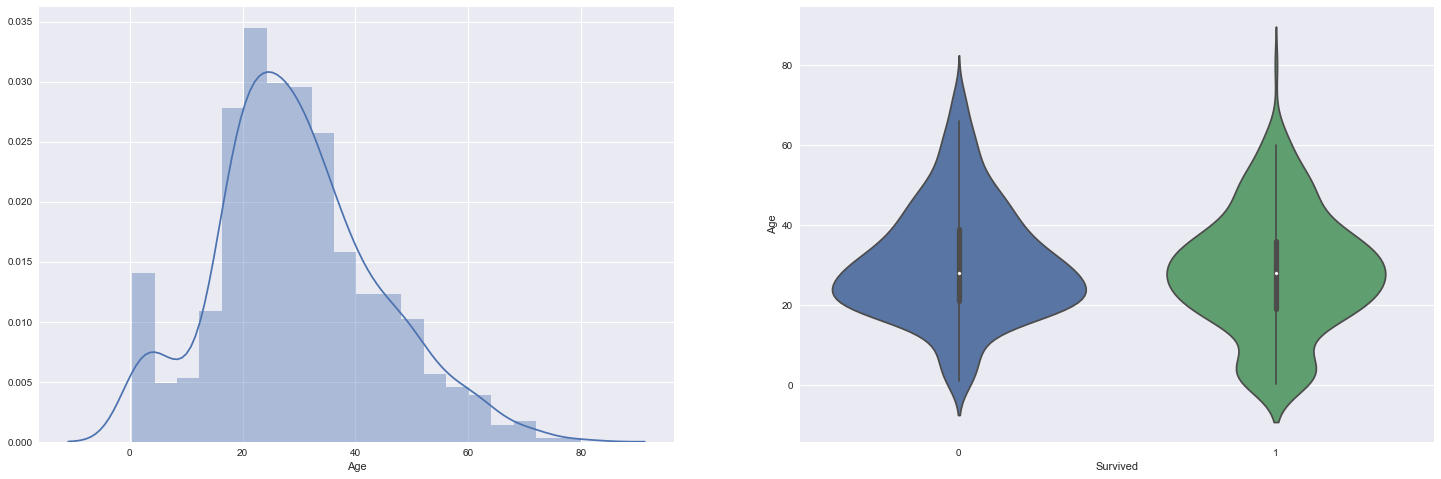

In [63]:
plt.subplot(1,2,1)
sns.distplot(hasage.Age);
plt.subplot(1,2,2)
sns.violinplot(hasage.Survived, hasage.Age);

Notice a bump under 20 for survival group, as expected. Consider stratifying, particularly for tree based algorithms.

## Gender

Proportion of female vs male survival

In [77]:
female = titanic[titanic.Sex == 0]
male = titanic[titanic.Sex == 1]
print("Proportion of females survived: %f" % (sum(female.Survived)/len(female)))
print("Proportion of males survived: %f" % (sum(male.Survived)/len(male)))

Proportion of females survived: 0.742038
Proportion of males survived: 0.188908


Yikes that's definitely going to be an important feature.

## Gender and age interaction terms